In [112]:
from hsmm_core.data_utils import TradingHours, DataLoader
from hsmm_core.labelling import DataLabellingSimple
from hsmm_core.consts import ThresholdMethod, LabellingChoice
import datetime as dt
import os
import pandas as pd




In [2]:
import fileutils as fileutils
listDataPath =os.listdir(fileutils.data_path)
symbols_listDataPath =[s for s in listDataPath if s.endswith('.L') or s.endswith('.I')]
fileutils.data_path


'/media/ak/DataOnly/FinDataReal/'

In [3]:
def get_files_for_ticker(ticker):
    """
    :return: Return all file names available for ticker, sort by name which is date
    """
    fin_data_dir = os.path.join("/media/ak/DataOnly",'Data') 
    total_path = os.path.join(fin_data_dir, ticker)
    # os.path.join(total_path, f)
    files_for_ticker = [f.split('.')[0] for f in os.listdir(total_path)
                        if (os.path.isfile(os.path.join(total_path, f)) and '.csv' in f and 'lock' not in f)]

    files_for_ticker.sort()
    return files_for_ticker

In [4]:
listofLabelsSymbols = os.listdir(fileutils.labels_path)
print("A bunch of symbols from the listdir above:",listofLabelsSymbols) 
LabelsPathsNames = ['Labels','LabelsAlternateOne','LabelsAlternateTwo','LabelsAlternateThree']

A bunch of symbols from the listdir above: ['EGS.L', 'SMIN.L', 'CRH.I', 'BLT.L', 'CNA.L', 'PRU.L', 'SHP.L', 'RTO.L', 'BATS.L', 'ULVR.L', 'RR.L', 'CPI.L', 'IEER.L', 'UU.L', 'RDSa.L', 'RSA.L', 'SPT.L', 'CEY.L', 'RB.L', 'TSCO.L', 'PSON.L', 'SDR.L', 'APF.L', 'STAN.L', 'REL.L', 'GKN.L', 'DMGOa.L', 'AZN.L', 'ECM.L', 'CCL.L', 'SGE.L', 'HSBA.L', 'RDSb.L', 'DGE.L', 'CPG.L', 'BARC.L', 'AV.L', 'AAL.L', 'VOD.L', 'RBS.L']


In [5]:
symbolsFirstLabels = os.listdir(fileutils.labels_path)
# for idx, symbol in enumerate(symbolsFirstLabels):
#     print(symbol)
    

In [10]:

index =10
nonDirectional = os.path.join(fileutils.labels_path, symbolsFirstLabels[index],'NON_DIRECTIONAL')

listofDates = os.listdir(nonDirectional)
sd = listofDates[0].split('.')[0]
ed = listofDates[-1].split('.')[0]

# fileIDX = 1
# pd.read_csv(os.path.join(nonDirectional,os.listdir(nonDirectional)[1]))
print(ed)

20180315


In [113]:
# for ticker in symbolsFirstLabels:
#     symboldateslist=get_files_for_ticker(str(ticker))
#     sd = symboldateslist[0]
#     ed = symboldateslist[-1]
#     print(sd,ed)

In [12]:
cleanRawList =os.listdir(fileutils.clean_raw_data_path)
symbols_rawList =[s for s in cleanRawList if s.endswith('.L') or s.endswith('.I')]
# crh_folder = os.path.join(fileutils.clean_raw_data_path, 'CRH.I')
# pd.read_csv(os.path.join(crh_folder, os.listdir(crh_folder)[1]))

In [13]:

#os.listdir(os.path.join("/media/ak/DataOnly",'Data') )

In [14]:
symboldateslist=get_files_for_ticker('BARC.L')
file= pd.read_csv(os.path.join(fileutils.clean_raw_data_path,'AV.L',symboldateslist[0]+'.csv'  ))

In [15]:
symboldateslist[-1]

'20170929'

In [115]:
os.listdir('/media/ak/DataOnly/Data/')

['RBS',
 'GSK',
 'PRU',
 'CRH.I',
 'CEY',
 'BLT.L',
 'BLT',
 'BAT',
 'FTSE',
 'NG.',
 'ITV',
 'DGE',
 'CNA.L',
 'IHG',
 'CNA',
 'PRU.L',
 'IEE',
 'CCL',
 'DMG',
 'III',
 'AV.',
 'BATS.L',
 'CPI',
 'CPI.L',
 'LGE',
 'C.N',
 'ABF',
 'features_models',
 'RDS',
 'KGF',
 'GS.N',
 'CPG',
 'MS.N',
 'BT',
 'CEY.L',
 'AZN',
 'BAR',
 'AAL',
 'APF.L',
 'AZN.L',
 'BP.',
 'CCL.L',
 'REL',
 'APF',
 'LAN',
 'IOG',
 'crypto',
 'EEM',
 'CPG.L',
 'BATS',
 'BARC.L',
 'AV.L',
 'GKN',
 'AAL.L',
 'ISF',
 'GD.N',
 'EGS',
 'MKS',
 'LMT.N',
 'CRH',
 'BT.',
 'ECM',
 'NG']

In [120]:
ticker = 'BARC.L'

sd = symboldateslist[0]
ed = symboldateslist[-1]

trading_hours_filter = TradingHours.only_mkt_hours

data_loader = DataLoader(trading_hours_filter)

data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)
print(data.keys())


dict_keys(['20170116', '20170117', '20170118', '20170119', '20170120', '20170123', '20170124', '20170125', '20170126', '20170127', '20170130', '20170131', '20170801', '20170802', '20170803', '20170804', '20170807', '20170808', '20170809', '20170810', '20170811', '20170814', '20170815', '20170816', '20170817', '20170818', '20170821', '20170822', '20170823', '20170824', '20170825', '20170829', '20170830', '20170831', '20170901', '20170904', '20170905', '20170906', '20170907', '20170908', '20170911', '20170912', '20170913', '20170914', '20170915', '20170918', '20170919', '20170920', '20170921', '20170922', '20170925', '20170926', '20170927', '20170928', '20170929'])


In [56]:
trading_hours_filter = TradingHours.only_mkt_hours

# data_loader = DataLoader(trading_hours_filter, ccy_bar=1000)

# data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)


labelling_method_params = [
# # {
# #     'labelling_method': LabellingChoice.ep_in_window,
# #     'rolling_window': 10,
# #     'threshold_method': ThresholdMethod.historical_vol_ma,
# #     'threshold_vol_window': 5,
# #     'updown_thrshd_vol_pct': 10.,
# #     'trading_hours_filter': trading_hours_filter,
# # },
{
    'labelling_method': LabellingChoice.price_move_in_window,
    'rolling_window': 100,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.01,
    'threshold_method': ThresholdMethod.arbitrary,
}]

In [46]:
# labelling_method_params = [
# {
#     'labelling_method': LabellingChoice.ep_in_window,
#     'rolling_window_': 100,
# #     'threshold_method': ThresholdMethod.historical_vol_ma,
#     'threshold_vol_window_': 0.1,
#     'updown_thrshd_vol_pct_': 10.,
#     'trading_hours_filter_': trading_hours_filter,
# }]

In [57]:
for label_init in labelling_method_params:
    labeller = DataLabellingSimple(label_init)
    the_label = labeller.get_label_name()
    labeller.label_training_data(data)

print ("ok")

ok


In [58]:
the_label

'label_PrMov__window_100__thres_arbitrary__1.0'

In [84]:
keys=list(data.keys())
from collections import defaultdict
labelsDict = defaultdict(dict)

for key in keys:
    df =pd.DataFrame(data[key])
    differentLabelTypes = df.filter(like='label', axis=1).columns.values
    labelsDict['label_EndPo__window_10__thres_arbitrary__0.0'][key] = df[differentLabelTypes[0]].value_counts()[1]/df[differentLabelTypes[0]].value_counts()[-1]
    labelsDict['label_EndPo__window_100__thres_arbitrary__0.0'][key] = df[differentLabelTypes[1]].value_counts()[1]/df[differentLabelTypes[1]].value_counts()[-1]
    labelsDict['label_PrMov__window_25__thres_arbitrary__0.1'][key] = df[differentLabelTypes[2]].value_counts()[0]/df[differentLabelTypes[2]].value_counts()[1]
    labelsDict['label_PrMov__window_50__thres_arbitrary__0.0'][key] = df[differentLabelTypes[3]].value_counts()[0]/df[differentLabelTypes[3]].value_counts()[1]

In [111]:

for key in keys:
    print(key)
#     df =pd.DataFrame(data[key])
#     print(df.head(4))

20170116
20170117
20170118
20170119
20170120
20170123
20170124
20170125
20170126
20170127
20170130
20170131
20170801
20170802
20170803
20170804
20170807
20170808
20170809
20170810
20170811
20170814
20170815
20170816
20170817
20170818
20170821
20170822
20170823
20170824
20170825
20170829
20170830
20170831
20170901
20170904
20170905
20170906
20170907
20170908
20170911
20170912
20170913
20170914
20170915
20170918
20170919
20170920
20170921
20170922
20170925
20170926
20170927
20170928
20170929


In [108]:
differentLabelTypes =test_df.filter(like='label', axis=1).columns.values

for key_, _ in enumerate(keys_):
    data[keys_[key_]].to_csv(ticker_labels_path+'/'+str(keys_[key_])+'.csv', index=False)


,TradedTime,TradedPrice,ReturnTradedPrice,Volume,Duration,label_EndPo__window_10__thres_arbitrary__0.0,label_EndPo__window_100__thres_arbitrary__0.0,label_PrMov__window_25__thres_arbitrary__0.1,label_PrMov__window_50__thres_arbitrary__0.0,label_PrMov__window_100__thres_arbitrary__1.0
0,08:00:01.608969,1.918000,0.000000e+00,1358.0,0.000000,1.0,1.0,0.0,1.0,0.0
1,08:00:03.724418,1.918000,0.000000e+00,1066.0,2.115449,1.0,1.0,0.0,1.0,0.0
2,08:00:54.283236,1.917000,-5.215124e-04,3817.0,50.558818,1.0,1.0,1.0,1.0,0.0
3,08:00:54.293155,1.917000,0.000000e+00,2300.0,0.009919,1.0,1.0,1.0,1.0,0.0
4,08:00:54.573503,1.917000,0.000000e+00,2565.0,0.280348,1.0,1.0,1.0,1.0,0.0
5,08:00:54.583507,1.917000,0.000000e+00,1593.0,0.010004,1.0,1.0,1.0,1.0,0.0
6,08:00:54.583568,1.917000,0.000000e+00,226.0,0.000061,1.0,1.0,1.0,1.0,0.0
7,08:01:08.122745,1.917000,0.000000e+00,478.0,13.539177,1.0,1.0,1.0,1.0,0.0
8,08:01:20.292392,1.917500,2.607902e-04,3131.0,12.169647,1.0,1.0,0.0,1.0,0.0
9,08:01:54.961964,1.918000,2.607222e-04,4545.0,34.669572,1.0,1.0,0.0,1.0,0.0


In [99]:
test_df[differentLabelTypes[3]]#.value_counts()

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
8352    NaN
8353    NaN
8354    NaN
8355    NaN
8356    NaN
8357    NaN
8358    NaN
8359    NaN
8360    NaN
8361    NaN
8362    NaN
8363    NaN
8364    NaN
8365    NaN
8366    NaN
8367    NaN
8368    NaN
8369    NaN
8370    NaN
8371    NaN
8372    NaN
8373    NaN
8374    NaN
8375    NaN
8376    NaN
8377    NaN
8378    NaN
8379    NaN
8380    NaN
8381    NaN
Name: label_PrMov__window_50__thres_arbitrary__0.0, Length: 8382, dtype: float64

In [100]:
balanceDf = df.from_dict(labelsDict)

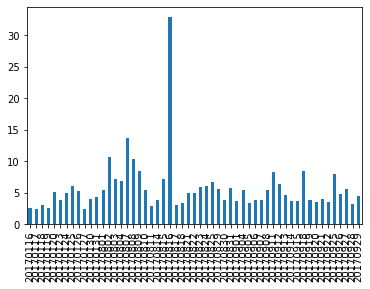

In [107]:
balanceDf[balanceDf.columns.values[2]].plot.bar()

In [106]:
import numpy as np
np.median(balanceDf[balanceDf.columns.values[2]])

4.931179775280899